In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objs as go


In [2]:
#visualization
import altair as alt
alt.data_transformers.disable_max_rows()


DataTransformerRegistry.enable('default')

In [3]:
df = pd.read_csv('D:\Loan_eligibility_prediction\loans_data.csv')
df.head()


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [4]:
df.shape

(111107, 19)

In [5]:
df.describe()


,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,1.111070e+05,89769.000000,8.976900e+04,111107.000000,52104.000000,111107.000000,111107.000000,1.111070e+05,110879.00000,111096.000000
mean,1.147718e+07,1075.795029,7.248600e+04,18.201003,34.902272,11.125105,0.168027,1.548314e+04,0.11766,0.029353
std,3.185508e+07,1474.133505,5.593094e+04,7.014495,21.970696,5.010267,0.484212,1.982115e+04,0.35142,0.260575
min,4.910000e+02,585.000000,4.033000e+03,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000
25%,8.162000e+03,705.000000,4.468800e+04,13.500000,16.000000,8.000000,0.000000,5.905000e+03,0.00000,0.000000
50%,1.418300e+04,724.000000,6.175200e+04,16.900000,32.000000,10.000000,0.000000,1.102700e+04,0.00000,0.000000
75%,2.382200e+04,741.000000,8.688700e+04,21.700000,51.000000,14.000000,0.000000,1.933800e+04,0.00000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,15.000000,1.730472e+06,7.00000,15.000000


In [6]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

Checking For Categorical & Numeric Columns

In [7]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])
print("Numeric_Column_Count =", numeric_data.shape)
print("Categorical_Column_Count =", categorical_data.shape)


Numeric_Column_Count = (111107, 10)
Categorical_Column_Count = (111107, 9)


Skewness & Kurtosis

skewness- measure of asymmetry of distribution of values in dataset. skewness=0 means symmetric distribution.
kurtosis-A distribution with high kurtosis has a sharp peak and heavy tails, indicating that it has more extreme values than a normal distribution.

In [8]:
skewness=numeric_data.skew().to_frame(name='Skewness_Value')
kurtosis=numeric_data.kurt().to_frame(name='Kurtosis_Value')
measures=skewness.merge(kurtosis,left_index=True,right_index=True)
print(measures)


                              Skewness_Value  Kurtosis_Value
Current Loan Amount                 2.419118        3.852202
Credit Score                        3.867406       13.004081
Annual Income                      44.746735     6398.677125
Years of Credit History             1.071718        1.746589
Months since last delinquent        0.435475       -0.748391
Number of Open Accounts             1.183009        3.041466
Number of Credit Problems           4.904766       49.287874
Current Credit Balance             14.184267      671.554383
Bankruptcies                        3.494668       18.197013
Tax Liens                          15.633209      400.088028


correlation

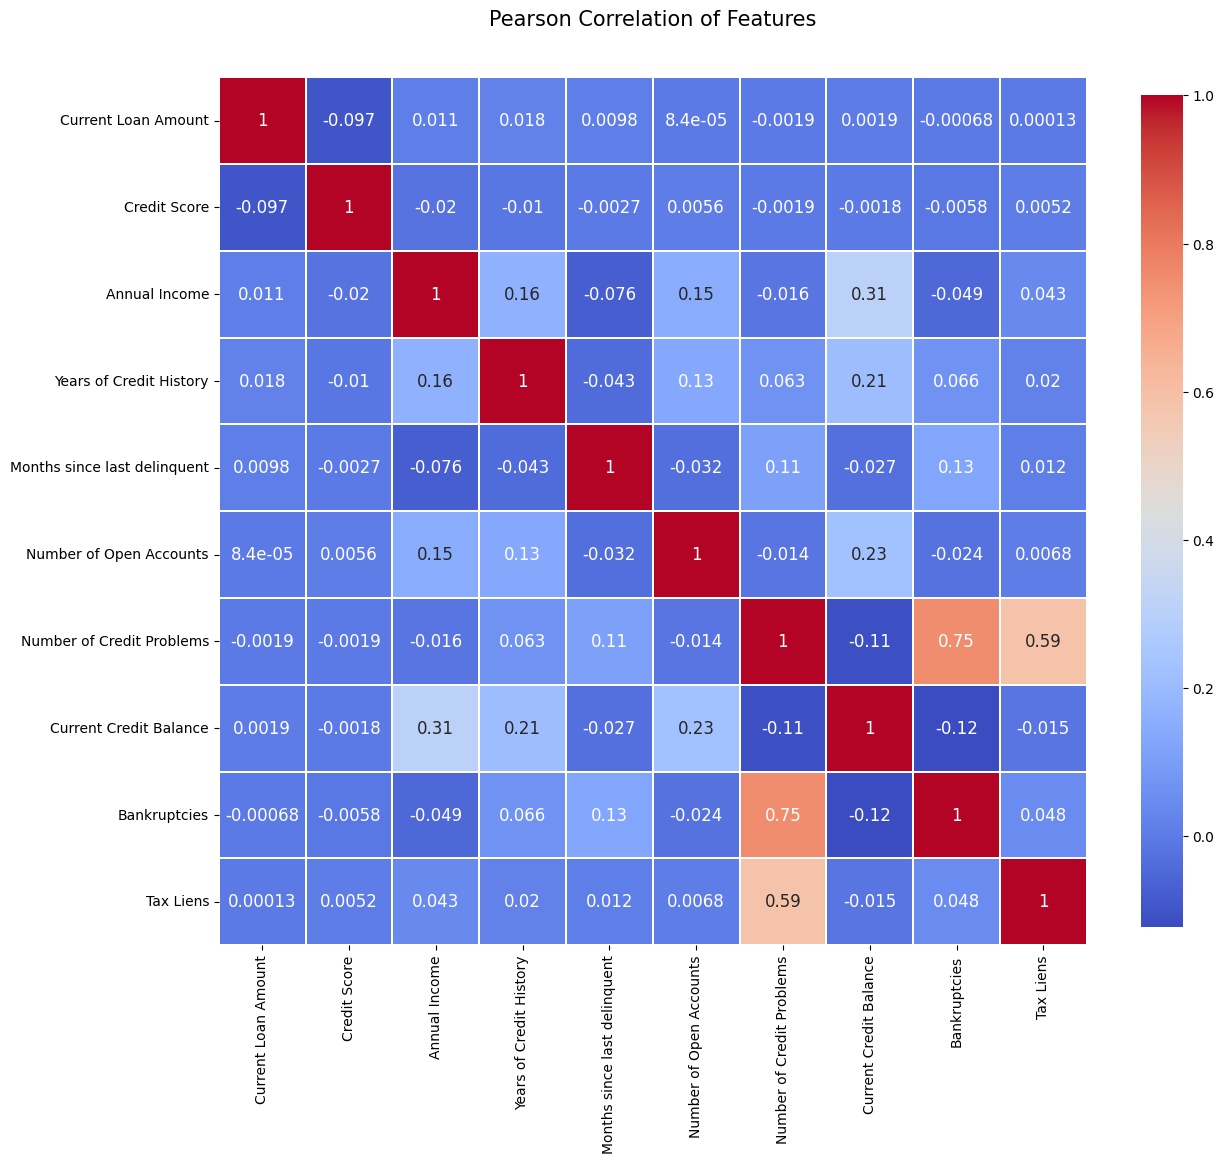

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    # Define your custom color palette
    custom_palette = sns.color_palette("coolwarm", as_cmap=True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = custom_palette,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,
        vmax=1.0, 
        linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    plt.show()

correlation_heatmap(numeric_data)


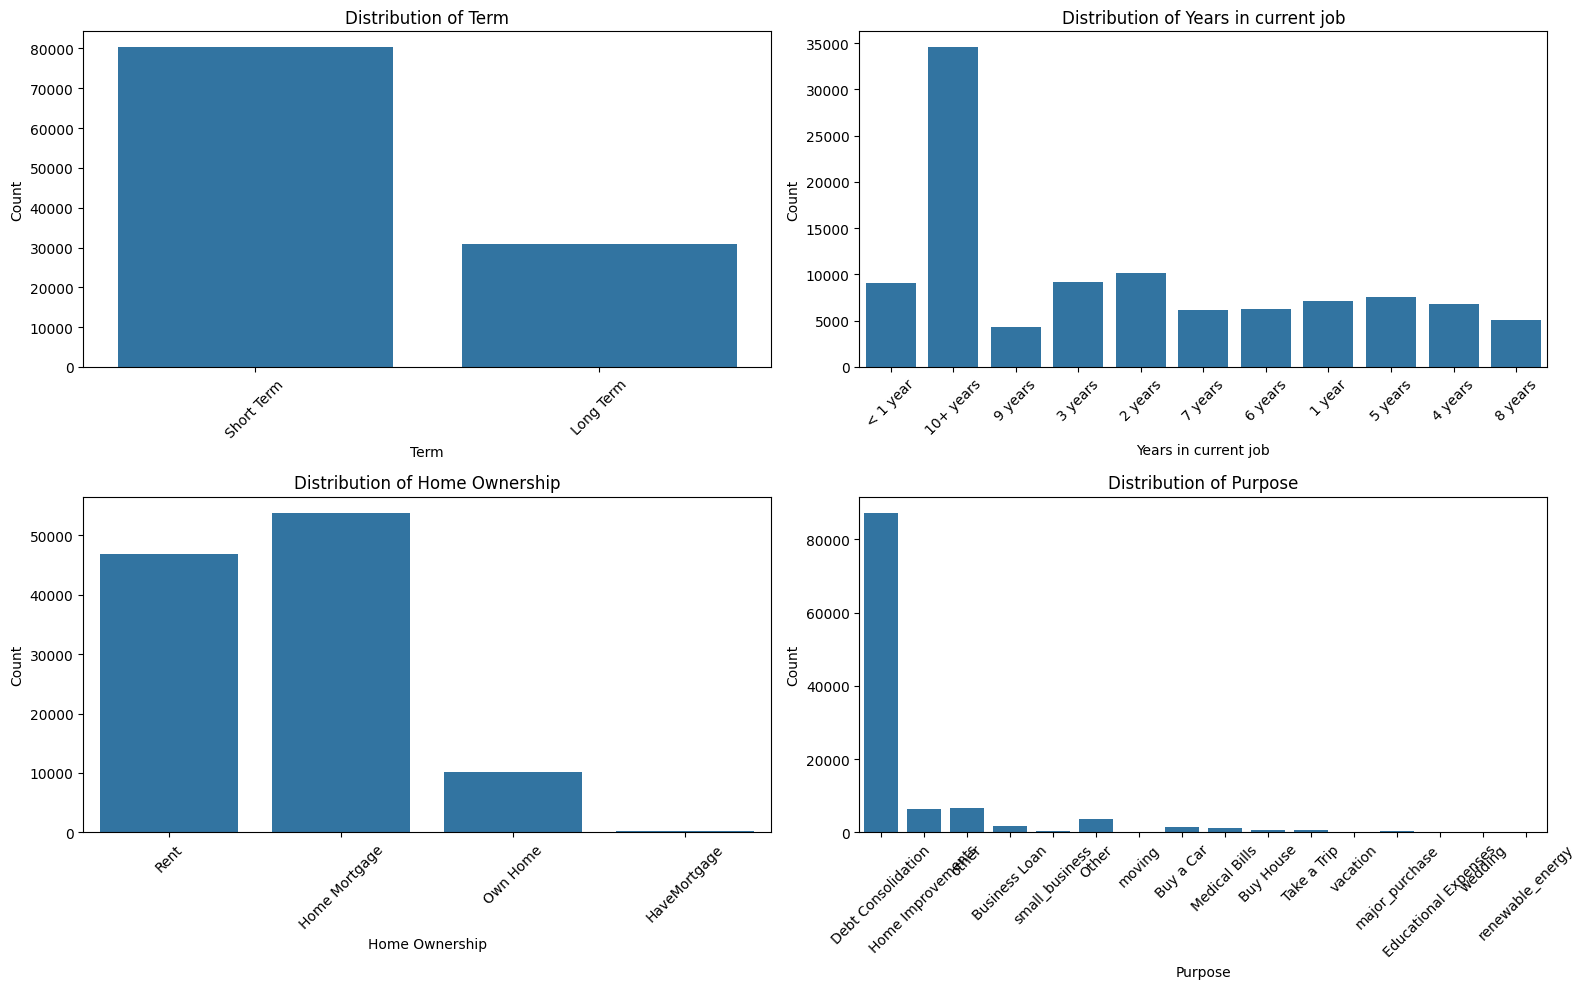

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the specified categorical columns
categorical_columns = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']

# Plotting the distribution of each categorical feature
plt.figure(figsize=(16, 10))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()
plt.show()


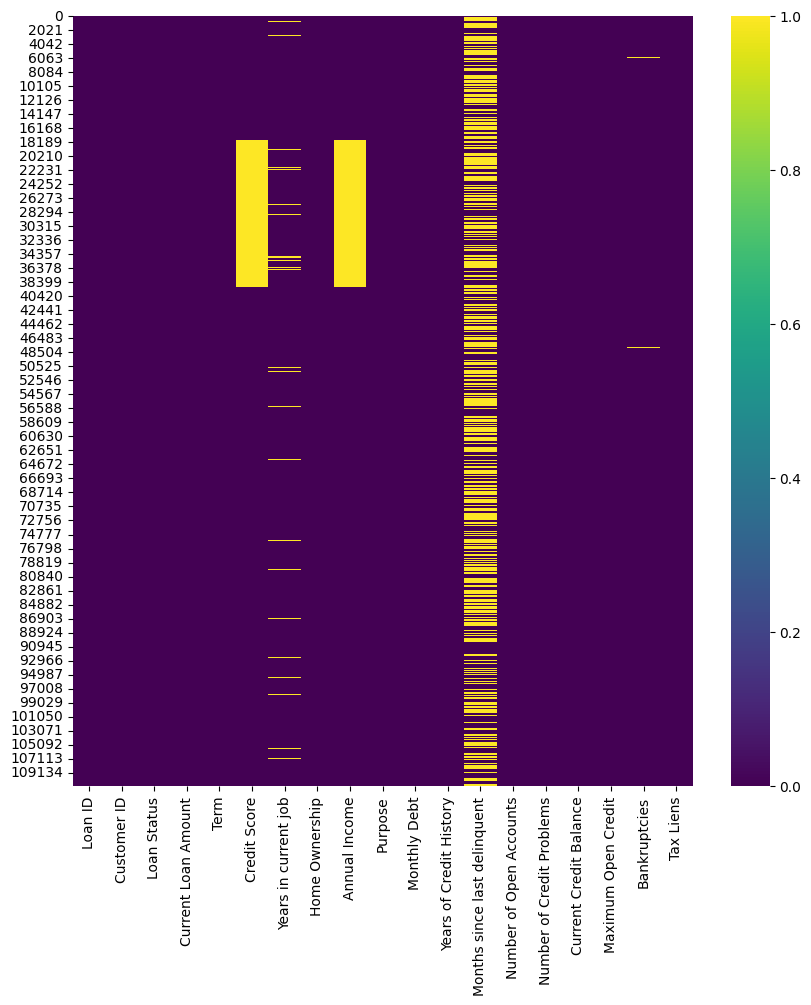

In [11]:
# Visualize a heatmap of the missing values
plt.figure(figsize=(10, 10))
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()


outlier detection and removal

In [12]:
for k, v in numeric_data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(numeric_data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))
#iterates over v numeric column in numeric_data dictionary, identify outlier by selecting less than (q1-1.5 *irq) and greater tha (q3 +1.58irq). irq-> interquartile range

Column Current Loan Amount outliers = 11.46%
Column Credit Score outliers = 7.20%
Column Annual Income outliers = 3.79%
Column Years of Credit History outliers = 3.19%
Column Months since last delinquent outliers = 0.02%
Column Number of Open Accounts outliers = 2.96%
Column Number of Credit Problems outliers = 100.00%
Column Current Credit Balance outliers = 5.18%
Column Bankruptcies outliers = 99.79%
Column Tax Liens outliers = 99.99%


In [13]:
import pandas as pd

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the quartiles and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

print(IQR)
#calculating iner quartile range

Current Loan Amount             15660.0
Credit Score                       36.0
Annual Income                   42199.0
Years of Credit History             8.2
Months since last delinquent       35.0
Number of Open Accounts             6.0
Number of Credit Problems           0.0
Current Credit Balance          13433.0
Bankruptcies                        0.0
Tax Liens                           0.0
dtype: float64


In [14]:
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)
#remove values that fall outside range [(Q1 - 1.5 * IQR),(Q3 + 1.5 * IQR)]

(68225, 19)


In [15]:
IQR=IQR.to_frame(name='IQR_Value')
IQR


,IQR_Value
Current Loan Amount,15660.0
Credit Score,36.0
Annual Income,42199.0
Years of Credit History,8.2
Months since last delinquent,35.0
Number of Open Accounts,6.0
Number of Credit Problems,0.0
Current Credit Balance,13433.0
Bankruptcies,0.0
Tax Liens,0.0


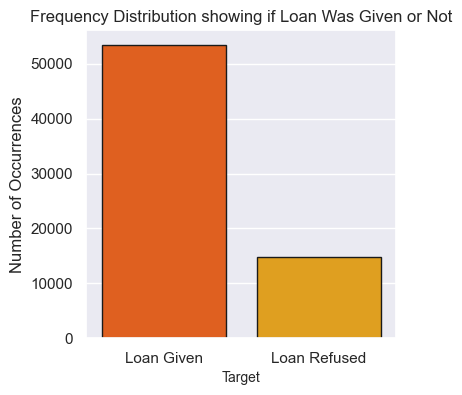

In [16]:
plt.figure(figsize=(4,4))
target_count = df["Loan Status"].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=target_count.index, y=target_count.values, alpha=1, edgecolor='k', palette='autumn')
plt.title('Frequency Distribution showing if Loan Was Given or Not')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Target', fontsize=10)
plt.xticks((0,1), ('Loan Given', 'Loan Refused'))
plt.show()


the number People who have applied for loan the Load Accepted is 4 time more than The Loan Rejected.

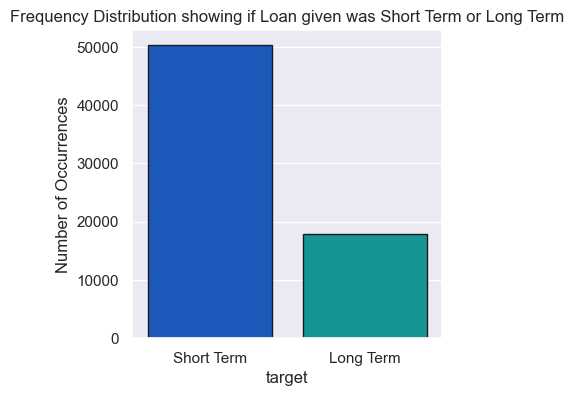

In [17]:
plt.figure(figsize=(4,4))
target_count = df["Term"].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=target_count.index, y=target_count.values, alpha=1, edgecolor='k', palette='winter')
plt.title('Frequency Distribution showing if Loan given was Short Term or Long Term')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('target', fontsize=12)
plt.xticks((0,1),('Short Term', 'Long Term'))
plt.show()


Reason for accepting and approving loan could be the Duration/ Period of loan. We can see that people with short term loan is more in numbers than with Long Term Loan.

In [18]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [19]:
df['Monthly Debt']=df['Monthly Debt'].str.replace('$','').astype(float)


Text(0, 0.5, 'Count')

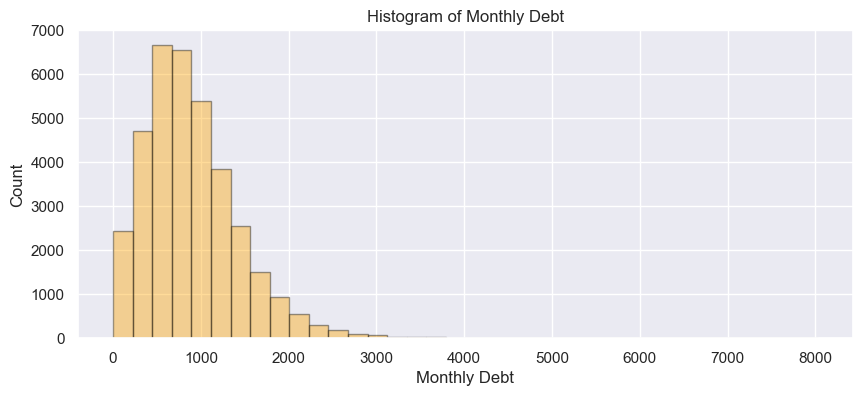

In [20]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.distplot(df['Monthly Debt'], hist=True, kde=False, bins=int(180/5), color = 'orange',hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Monthly Debt')
plt.xlabel('Monthly Debt')
plt.ylabel('Count')


More than 50% of people falls under Monthly Debt bucket of 0 to 2000.

Text(0.5, 1.0, 'Distribution of Current Loan Amount after dropping Outliers')

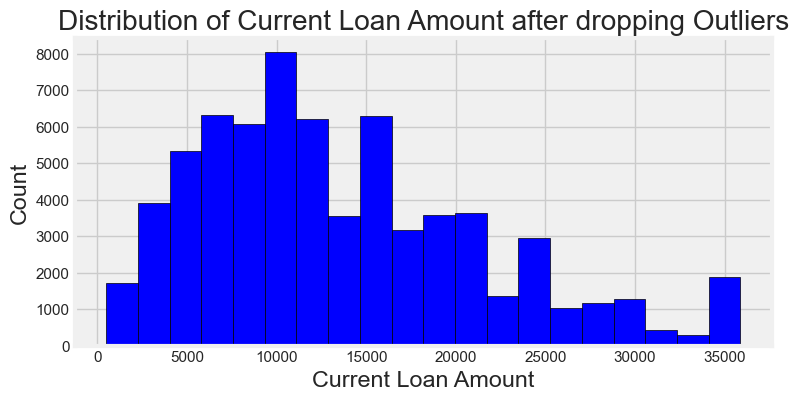

In [21]:
plt.figure(figsize=(9,4))
plt.style.use('fivethirtyeight')
plt.hist(df["Current Loan Amount"], edgecolor = "black", color = 'blue',bins=20, label='Annual Income')
plt.xlabel ("Current Loan Amount")
plt.ylabel ("Count")
plt.title ("Distribution of Current Loan Amount after dropping Outliers")


Text(0.5, 1.0, 'Distribution of Annual Income after dropping Outliers')

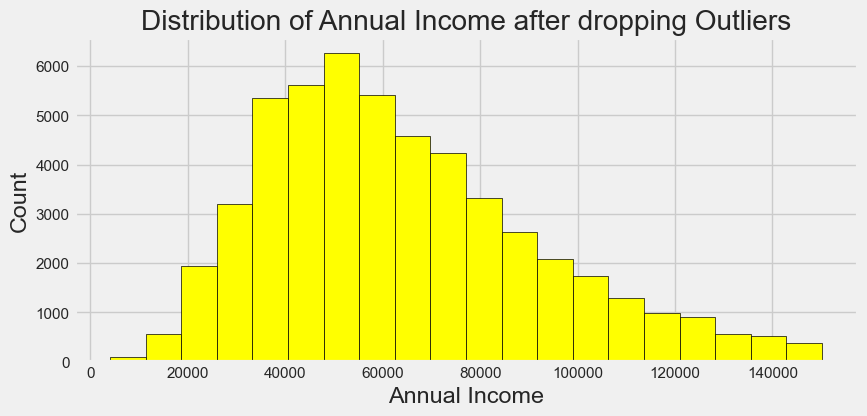

In [22]:
plt.figure(figsize=(9,4))
plt.style.use('fivethirtyeight')
plt.hist(df["Annual Income"], edgecolor = "black", color = 'yellow',bins=20, label='Annual Income')
plt.xlabel ("Annual Income")
plt.ylabel ("Count")
plt.title ("Distribution of Annual Income after dropping Outliers")


Text(0.5, 1.0, 'Distribution of Current Credit Balance after dropping Outliers')

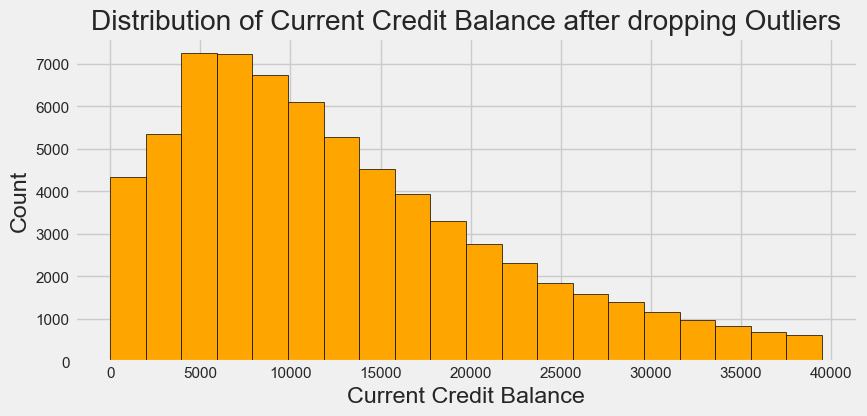

In [23]:
plt.figure(figsize=(9,4))
plt.style.use('fivethirtyeight')
plt.hist(df["Current Credit Balance"], edgecolor = "black", color = 'orange',bins=20, label='Annual Income')
plt.xlabel ("Current Credit Balance")
plt.ylabel ("Count")
plt.title ("Distribution of Current Credit Balance after dropping Outliers")


In [24]:
c = pd.crosstab(df['Loan Status'],df['Years in current job']).apply(lambda x: x/x.sum(), axis=1)
c=c.T
c["Odds"]=c["Loan Given"]/c["Loan Refused"]
print(c)


Loan Status           Loan Given  Loan Refused      Odds
Years in current job                                    
1 year                  0.070428      0.071677  0.982572
10+ years               0.305883      0.296725  1.030865
2 years                 0.099681      0.096611  1.031774
3 years                 0.091025      0.082972  1.097054
4 years                 0.066332      0.068552  0.967619
5 years                 0.073713      0.074306  0.992021
6 years                 0.060226      0.063508  0.948325
7 years                 0.056999      0.059956  0.950687
8 years                 0.046643      0.050082  0.931335
9 years                 0.039668      0.042907  0.924506
< 1 year                0.089402      0.092704  0.964377


the loan being accepted for the people above 10 y of exp. in current company and people with experience of 1-2 years is high.

In [25]:
df.isnull().sum()


Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    16612
Years in current job             2393
Home Ownership                      0
Annual Income                   16612
Purpose                             0
Monthly Debt                    32314
Years of Credit History             0
Months since last delinquent    36387
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      153
Tax Liens                           4
dtype: int64

In [26]:
import pandas as pd


# Replace NaN values in numerical columns with mean
numerical_cols = ['Credit Score', 'Years of Credit History', 'Months since last delinquent', 'Bankruptcies', 'Tax Liens']
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Replace NaN values in categorical columns with mode
categorical_cols = ['Years in current job']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

import pandas as pd

# Replace NaN values in 'Annual Income' column with mean
df['Annual Income'].fillna(df['Annual Income'].mean(), inplace=True)

# Replace NaN values in 'Monthly Debt' column with mean
df['Monthly Debt'].fillna(df['Monthly Debt'].mean(), inplace=True)




In [28]:
# any remaining missing values?
print(df.isnull().sum())


Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64


In [27]:
import pandas as pd
# Select columns with categorical data types
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Print the names of categorical columns
print("Categorical columns:", categorical_cols)


Categorical columns: ['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose', 'Maximum Open Credit']


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68225 entries, 17782 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       68225 non-null  object 
 1   Customer ID                   68225 non-null  object 
 2   Loan Status                   68225 non-null  object 
 3   Current Loan Amount           68225 non-null  int64  
 4   Term                          68225 non-null  object 
 5   Credit Score                  68225 non-null  float64
 6   Years in current job          68225 non-null  object 
 7   Home Ownership                68225 non-null  object 
 8   Annual Income                 68225 non-null  float64
 9   Purpose                       68225 non-null  object 
 10  Monthly Debt                  68225 non-null  float64
 11  Years of Credit History       68225 non-null  float64
 12  Months since last delinquent  68225 non-null  float64
 13  N

In [29]:
df.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
17782,87b6a064-b524-4cff-a968-b176bdc70075,000bbb5d-3a62-4712-908e-caacd7a815d5,Loan Given,33231,Short Term,718.732703,2 years,Rent,63829.241218,Debt Consolidation,1334.28,17.7,34.18525,13,0,38005,68602,0.0,0.0
17783,4850727e-1ab2-4af1-b269-a95dd99ae975,4498fc97-e3f6-4789-b81b-c971fe967bb3,Loan Given,23609,Short Term,718.732703,2 years,Rent,63829.241218,Debt Consolidation,86.91,15.0,34.18525,15,0,372,13772,0.0,0.0


In [30]:
import pandas as pd


# Convert 'Loan Status' and 'Home Ownership' to categorical data type
df['Loan Status'] = pd.Categorical(df['Loan Status'])
df['Home Ownership'] = pd.Categorical(df['Home Ownership'])
df['Term'] = pd.Categorical(df['Term'])


# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Loan Status', 'Home Ownership','Term'])

# Display the encoded DataFrame
df_encoded.head()


,Loan ID,Customer ID,Current Loan Amount,Credit Score,Years in current job,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,...,Bankruptcies,Tax Liens,Loan Status_Loan Given,Loan Status_Loan Refused,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Term_Long Term,Term_Short Term
17782,87b6a064-b524-4cff-a968-b176bdc70075,000bbb5d-3a62-4712-908e-caacd7a815d5,33231,718.732703,2 years,63829.241218,Debt Consolidation,1334.28,17.7,34.18525,...,0.0,0.0,True,False,False,False,False,True,False,True
17783,4850727e-1ab2-4af1-b269-a95dd99ae975,4498fc97-e3f6-4789-b81b-c971fe967bb3,23609,718.732703,2 years,63829.241218,Debt Consolidation,86.91,15.0,34.18525,...,0.0,0.0,True,False,False,False,False,True,False,True
17784,54a17b9a-c581-4f08-bc2f-21e2765e57c6,2b0ca10b-5a2c-4521-9c3f-7a55de743006,35651,718.732703,9 years,63829.241218,Debt Consolidation,1489.53,27.0,73.00000,...,0.0,0.0,False,True,False,False,False,True,True,False
17788,d77b643f-f69c-482a-a5ae-c202b9c71836,4776e4fb-d0c7-4dc6-8627-554733df8561,13972,718.732703,10+ years,63829.241218,Debt Consolidation,1439.68,19.5,34.18525,...,0.0,0.0,True,False,False,True,False,False,True,False
17789,938d7ae6-4de8-41ae-8907-1e871484a377,f823e5a0-ec22-4c16-80d5-c54ca952ee67,13838,718.732703,7 years,63829.241218,Debt Consolidation,1347.21,16.0,34.18525,...,0.0,0.0,True,False,False,True,False,False,False,True


In [31]:
# Extract numerical values from 'Years in current job' column
df_encoded['Years in current job'] = df_encoded['Years in current job'].str.extract(r'(\d+)')

# Convert '2 years' to 2 and '10+ years' to 10
df_encoded['Years in current job'] = df_encoded['Years in current job'].replace({'2': 2, '10+': 10})

# Convert the extracted numerical values to numeric data type
df_encoded['Years in current job'] = pd.to_numeric(df_encoded['Years in current job'], errors='coerce')


In [32]:
import pandas as pd

# Replace True with 1 and False with 0
df_encoded = df_encoded.replace({True: 1, False: 0})

# Display the modified DataFrame
df_encoded.head()


,Loan ID,Customer ID,Current Loan Amount,Credit Score,Years in current job,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,...,Bankruptcies,Tax Liens,Loan Status_Loan Given,Loan Status_Loan Refused,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Term_Long Term,Term_Short Term
17782,87b6a064-b524-4cff-a968-b176bdc70075,000bbb5d-3a62-4712-908e-caacd7a815d5,33231,718.732703,2,63829.241218,Debt Consolidation,1334.28,17.7,34.18525,...,0.0,0.0,1,0,0,0,0,1,0,1
17783,4850727e-1ab2-4af1-b269-a95dd99ae975,4498fc97-e3f6-4789-b81b-c971fe967bb3,23609,718.732703,2,63829.241218,Debt Consolidation,86.91,15.0,34.18525,...,0.0,0.0,1,0,0,0,0,1,0,1
17784,54a17b9a-c581-4f08-bc2f-21e2765e57c6,2b0ca10b-5a2c-4521-9c3f-7a55de743006,35651,718.732703,9,63829.241218,Debt Consolidation,1489.53,27.0,73.00000,...,0.0,0.0,0,1,0,0,0,1,1,0
17788,d77b643f-f69c-482a-a5ae-c202b9c71836,4776e4fb-d0c7-4dc6-8627-554733df8561,13972,718.732703,10,63829.241218,Debt Consolidation,1439.68,19.5,34.18525,...,0.0,0.0,1,0,0,1,0,0,1,0
17789,938d7ae6-4de8-41ae-8907-1e871484a377,f823e5a0-ec22-4c16-80d5-c54ca952ee67,13838,718.732703,7,63829.241218,Debt Consolidation,1347.21,16.0,34.18525,...,0.0,0.0,1,0,0,1,0,0,0,1


In [33]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68225 entries, 17782 to 111106
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       68225 non-null  object 
 1   Customer ID                   68225 non-null  object 
 2   Current Loan Amount           68225 non-null  int64  
 3   Credit Score                  68225 non-null  float64
 4   Years in current job          68225 non-null  int64  
 5   Annual Income                 68225 non-null  float64
 6   Purpose                       68225 non-null  object 
 7   Monthly Debt                  68225 non-null  float64
 8   Years of Credit History       68225 non-null  float64
 9   Months since last delinquent  68225 non-null  float64
 10  Number of Open Accounts       68225 non-null  int64  
 11  Number of Credit Problems     68225 non-null  int64  
 12  Current Credit Balance        68225 non-null  int64  
 13  M

In [34]:
df_encoded.drop(['Loan ID', 'Customer ID','Purpose'], axis=1, inplace=True)


In [35]:
df_encoded.columns

Index(['Current Loan Amount', 'Credit Score', 'Years in current job',
       'Annual Income', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',
       'Loan Status_Loan Given', 'Loan Status_Loan Refused',
       'Home Ownership_HaveMortgage', 'Home Ownership_Home Mortgage',
       'Home Ownership_Own Home', 'Home Ownership_Rent', 'Term_Long Term',
       'Term_Short Term'],
      dtype='object')

In [36]:
df_encoded.head(1)

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,Bankruptcies,Tax Liens,Loan Status_Loan Given,Loan Status_Loan Refused,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Term_Long Term,Term_Short Term
17782,33231,718.732703,2,63829.241218,1334.28,17.7,34.18525,13,0,38005,...,0.0,0.0,1,0,0,0,0,1,0,1


In [37]:
# Selecting independent variables
X = df_encoded.drop(['Loan Status_Loan Given', 'Loan Status_Loan Refused'], axis=1).values  # Features: Exclude Loan Status columns

# Selecting dependent variable
y = df_encoded[['Loan Status_Loan Given', 'Loan Status_Loan Refused']].values  # Target: Loan Status


In [38]:
X

array([[33231, 718.7327030011819, 2, ..., 1, 0, 1],
       [23609, 718.7327030011819, 2, ..., 1, 0, 1],
       [35651, 718.7327030011819, 9, ..., 1, 1, 0],
       ...,
       [15237, 706.0, 10, ..., 0, 0, 1],
       [10413, 719.0, 5, ..., 0, 0, 1],
       [9209, 708.0, 1, ..., 0, 1, 0]], dtype=object)

In [39]:
y

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=int64)

In [40]:
from sklearn.model_selection import train_test_split #splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [41]:
print(X_train)

[[12771 724.0 3 ... 1 0 1]
 [7259 739.0 6 ... 1 0 1]
 [29064 718.7327030011819 3 ... 1 1 0]
 ...
 [14777 718.7327030011819 10 ... 0 0 1]
 [11992 718.7327030011819 10 ... 0 1 0]
 [9905 730.0 10 ... 0 0 1]]


In [42]:

from sklearn.preprocessing import StandardScaler
import numpy as np

# Identify non-numeric values in X_train and X_test
non_numeric_train = ~np.char.isnumeric(X_train.astype(str))
non_numeric_test = ~np.char.isnumeric(X_test.astype(str))

# Replace non-numeric values with NaN
X_train_clean = X_train.copy()
X_train_clean[non_numeric_train] = np.nan

X_test_clean = X_test.copy()
X_test_clean[non_numeric_test] = np.nan

# Convert to float
X_train_numeric = X_train_clean.astype(float)
X_test_numeric = X_test_clean.astype(float)

# Initialize the StandardScaler
ss = StandardScaler()

# Fit and transform the training data
X_train_scaled = ss.fit_transform(X_train_numeric)

# Transform the testing data using the same scaler
X_test_scaled = ss.transform(X_test_numeric)




Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=10)

# Train the Decision Tree classifier
decision_tree.fit(X_train_scaled, y_train)

# Predictions on the training set
train_preds = decision_tree.predict(X_train_scaled)

# Predictions on the testing set
test_preds = decision_tree.predict(X_test_scaled)

# Accuracy on the training set
train_accuracy = accuracy_score(y_train, train_preds)
print("Training Accuracy:", train_accuracy)

# Accuracy on the testing set
test_accuracy = accuracy_score(y_test, test_preds)
print("Testing Accuracy:", test_accuracy)

# Classification report on the testing set
print("Classification Report:")
print(classification_report(y_test, test_preds))


Training Accuracy: 1.0
Testing Accuracy: 0.7270795163063393
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     10753
           1       0.34      0.31      0.33      2892

   micro avg       0.73      0.73      0.73     13645
   macro avg       0.58      0.58      0.58     13645
weighted avg       0.72      0.73      0.72     13645
 samples avg       0.73      0.73      0.73     13645



Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

# Instantiate Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Transform the testing data using the same imputer
X_test_imputed = imputer.transform(X_test_scaled)

# Train the Naive Bayes classifier using the imputed training data
naive_bayes.fit(X_train_imputed, y_train[:, 0])

# Predictions on the training set
train_preds = naive_bayes.predict(X_train_imputed)

# Predictions on the testing set
test_preds = naive_bayes.predict(X_test_imputed)

# Accuracy on the training set
train_accuracy = accuracy_score(y_train[:, 0], train_preds)
print("Training Accuracy:", train_accuracy)

# Accuracy on the testing set
test_accuracy = accuracy_score(y_test[:, 0], test_preds)
print("Testing Accuracy:", test_accuracy)

# Classification report on the testing set
print("Classification Report:")
print(classification_report(y_test[:, 0], test_preds))


Training Accuracy: 0.5175338951997068
Testing Accuracy: 0.5238548919017956
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.61      0.35      2892
           1       0.83      0.50      0.62     10753

    accuracy                           0.52     13645
   macro avg       0.54      0.56      0.49     13645
weighted avg       0.70      0.52      0.57     13645



KNN

In [53]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Replace non-numeric values with NaN
X_train_numeric = np.where(X_train == '#VALUE!', np.nan, X_train)
X_test_numeric = np.where(X_test == '#VALUE!', np.nan, X_test)

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train_numeric)
X_test_imputed = imputer.transform(X_test_numeric)

# Normalize the features to a range [0, 1]
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train_imputed)
X_test_normalized = scaler.transform(X_test_imputed)

# Instantiate the KNN classifier
knn = KNeighborsClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform grid search cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_normalized, y_train[:, 0])

# Get the best model from the grid search
best_knn = grid_search.best_estimator_

# Train the best KNN classifier using the imputed and normalized training data
best_knn.fit(X_train_normalized, y_train[:, 0])

# Predictions on the testing set
test_preds = best_knn.predict(X_test_normalized)

# Accuracy on the testing set
test_accuracy = accuracy_score(y_test[:, 0], test_preds)
print("Testing Accuracy:", test_accuracy)

# Classification report on the testing set
print("Classification Report:")
print(classification_report(y_test[:, 0], test_preds))

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Testing Accuracy: 0.7813851227555881
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.09      0.15      2892
           1       0.80      0.97      0.87     10753

    accuracy                           0.78     13645
   macro avg       0.61      0.53      0.51     13645
weighted avg       0.72      0.78      0.72     13645

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train[:, 0])

# Get the best model from the grid search
best_rf = grid_search.best_estimator_

# Train the best Random Forest classifier
best_rf.fit(X_train_scaled, y_train[:, 0])

# Predictions on the testing set
test_preds = best_rf.predict(X_test_scaled)

# Accuracy on the testing set
test_accuracy = accuracy_score(y_test[:, 0], test_preds)
print("Testing Accuracy:", test_accuracy)

# Classification report on the testing set
print("Classification Report:")
print(classification_report(y_test[:, 0], test_preds))

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Testing Accuracy: 0.7892268230120923
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.02      0.03      2892
           1       0.79      1.00      0.88     10753

    accuracy                           0.79     13645
   macro avg       0.69      0.51      0.46     13645
weighted avg       0.75      0.79      0.70     13645

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
